In [1]:
# import the libraries that I will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# read the data
df_train = pd.read_csv('train.csv')
# see the first 5 rows
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# See the columns' name
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Analysing 'Sale Price'

In [4]:
# with the `describe()` we can see statistics summary of a value
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

We can see that the minimum price is no zero so initially we don't have problem with this data

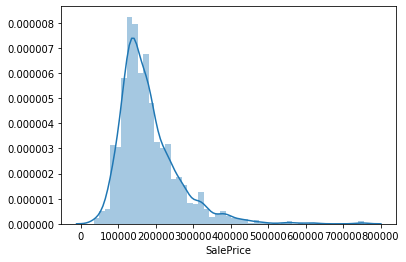

In [5]:
# Let's visualize the  'Saleprice'
# I' ll use the seaborn library 
sns.distplot(df_train['SalePrice']);

From this plot we can conclude that:
* SalePrice deviate from the normal distribution. https://www.mathsisfun.com/data/standard-normal-distribution.html
* It has positive skewness. https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa
* Show peakedness.

In [6]:
# Let's see the measures of the saleprice
print('Skewness: %f' %df_train['SalePrice'].skew())
print('Kurtosis: %f' %df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


If we the data_descriprion we could probably see a relation between Saleprice and 'GrLivArea','TotalBsmtSF','OverallQual' and 'YearBuilt'. Hence, let's see the relation that they have.

### Relation with Numerical Values

Because we will see the relationship between SalePrice and Two other numerical Values, it could be good to create a function.

In [7]:
#Create the function that will return a plot with the relationship between two variables
def rel(data,var,y='SalePrice'):
    '''
    This function returns a scatter plot with the relationship between two variables(Numerical both of them).
    var = the numerical value that will be put in the horizontal axis
    y= the numerical value that will be put in the vertical axis
    
    '''
    data.plot.scatter(x=var,y=y,ylim=(0,data[y].max()+100000))

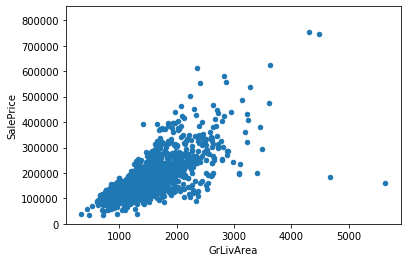

In [8]:
#Using the function for 'GrLivArea'
rel(df_train,'GrLivArea','SalePrice')

### We can see that the two variables have a linear relationship

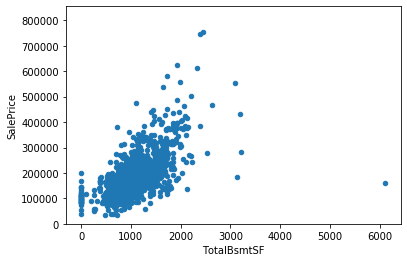

In [9]:
#Using the function for 'TotalBsmtSF'
rel(df_train,'TotalBsmtSF','SalePrice')

### In this case we can see a more strong linear relationship

## Let's see the relationship between the categorical features

Again we will create a function that will return a plot with the relationship

In [10]:
# Create the function 
def cat_rel(data,var,y='SalePrice'):
    '''
    This function returns a boxplot with the relationship between two variables(One of them is categorical).
    var = the categorical value that will be put in the horizontal axis
    y= the numerical value that will be put in the vertical axis
    
    '''
    fig,ax = plt.subplots(figsize=(8,6))
    fig = sns.boxplot(x=var,y=y, data=data)
    fig.axis(ymin=0,ymax=data[y].max()+100000)
    

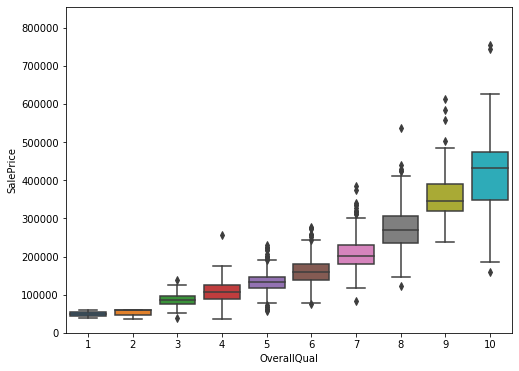

In [11]:
# Let's use the function for the "OverallQual"
cat_rel(df_train,'OverallQual')

We can understnand that the higher the OverallQual the better is the SalePrice

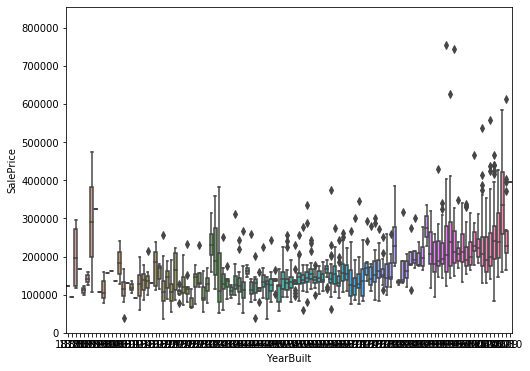

In [12]:
# Let's use the fuction for the 'YearBuilt'
cat_rel(df_train,'YearBuilt')

Although it's not a strong tendency, I'd say that 'SalePrice' is more prone to spend more money in new stuff than in old relics.

* We finally saw that there is a positive relation between SalePrice,GrLivArea and TotalBsmtSF and of course a stronge relationshipr between SalePrice,OverallQual and YearBuilt. 
* But there are many more relationship that we should analyse. Because the number is huge we have to choice the right features (feature selection) and make the analysis.

#### Let's do it.

## To explore the features we will
* Correlation matrix (heatmap style).
* 'SalePrice' correlation matrix (zoomed heatmap style).
* Scatter plots between the most correlated variables (move like Jagger style).


## Correlation matrix(heatmap style).

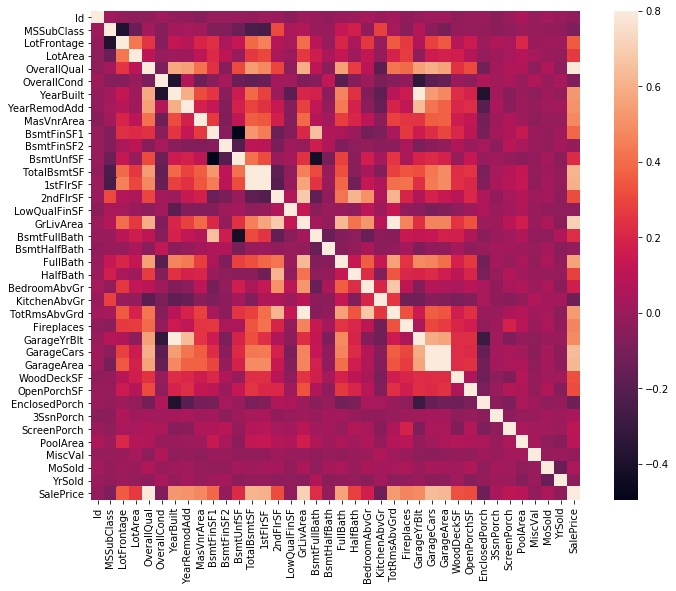

In [13]:
#correlation matrix
corrmat=df_train.corr()
# use matplotlib to create figure and axis
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8,square=True)


Heatmap is a great tool to identify correlations between variables. In our case that we have a good amound of variables heatmap is really helpfull and it is an essential tool. 

## 'SalePrice' correlation matrix (zoomed heatmap style)

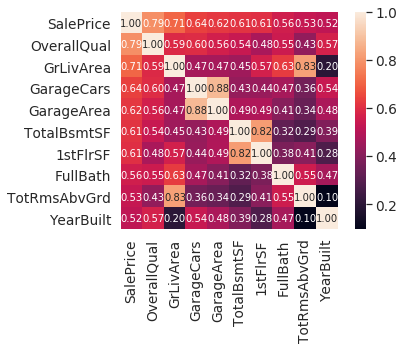

In [14]:
# SalePrice correlation matrix
k=10 # the number of variables in the matrix
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index # returns the k most correlated values with Saleprice
cm = np.corrcoef(df_train[cols].values.T) # using numpy to create an array of corr
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot= True, square=True, fmt='.2f',
                annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

We can see that we have more variables to analyse.
* I would like to mention that GarageCars and GarageArea is almost the some so we'll continue with GarageCars beacause it has higher correlation that GarageArea.
* TotalBsmtSF and 1stFloor are also seem the some so we'll continue with TotalBsmtSF.
* TotRmsAbvGrd and GrLivArea is again almost the some and we will continue with TotRMABvGrd

### Let's plot them:


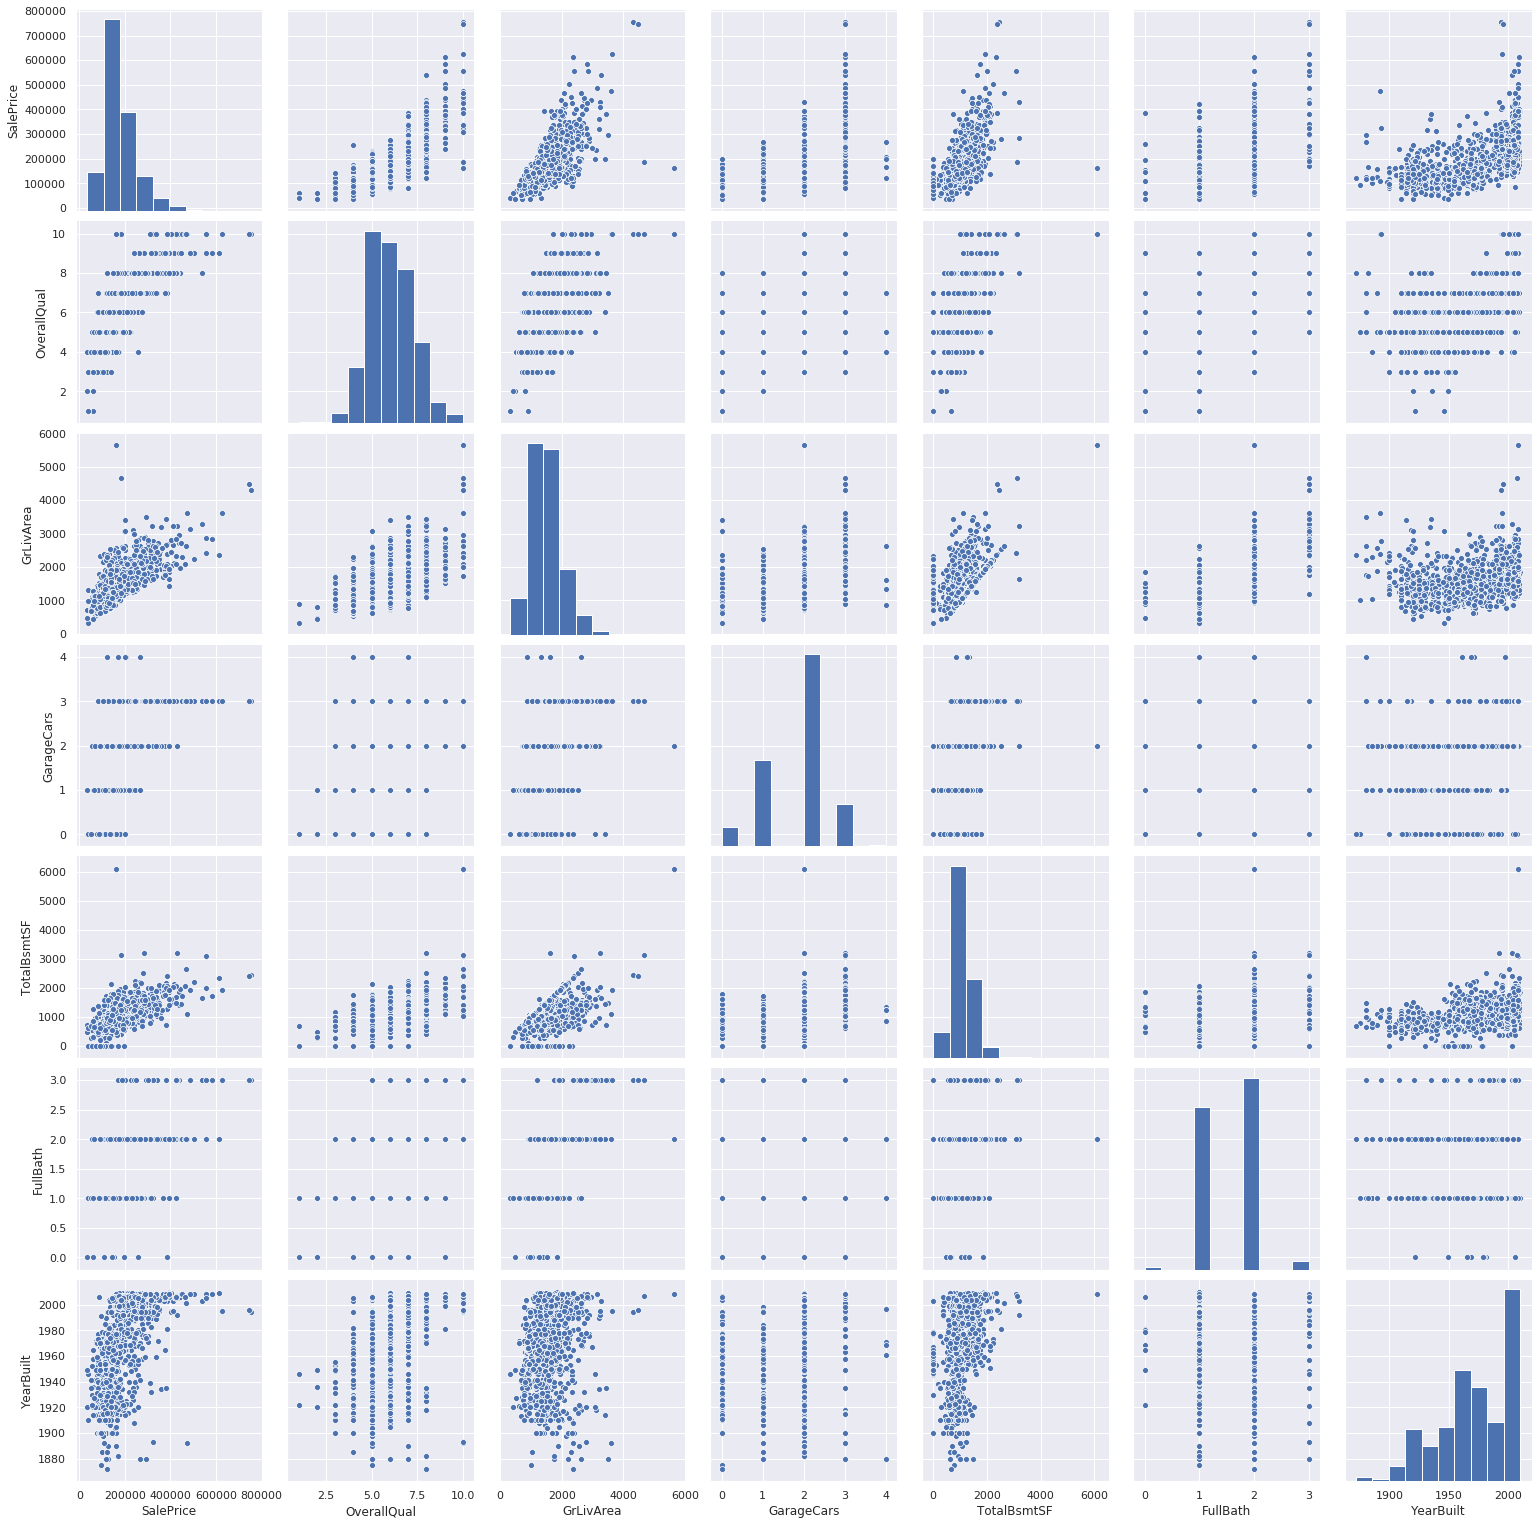

In [15]:
#Scatterplots
sns.set()
cols=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols],size=3)
plt.show()

# Missing data

In [16]:
# Let's find the missing data
total_mis_da=df_train.isnull().sum().sort_values(ascending=False)
per_mes_da=round((df_train.isnull().sum()/df_train.isnull().count()*100),2).sort_values(ascending=False)
missing_data=pd.concat([total_mis_da,per_mes_da],axis=1,keys=['Total','Percent'])
missing_data.head()

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26


* If we have missing data under 15% we will delete them and we will not try to fill them. If we see the data that we are going to delete we will see that they don't have strong relationship with SalePrice so we will not miss them.
#### Finally I will delete all the variables with missing data except the variable 'Electrical', that has only one missing data so we will delete this observation.

In [19]:
#Delete the data
df_train=df_train.drop((missing_data[missing_data['Total']>1]).index,1)
df_train=df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 63, dtype: int64

## Outliers
Let's find the outliers and delete them for our dataset.
To do so we have to standardize the data.

In [20]:
#standardizing the data
sp_scaler=StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])
low_range=sp_scaler[sp_scaler[:,0].argsort()[:10]]
high_range=sp_scaler[sp_scaler[:,0].argsort()[-10:]]
print( 'outer range (low) of the distribution')
print(low_range)
print ('outer range (high) of the distribution')
print(high_range)

outer range (low) of the distribution
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]
outer range (high) of the distribution
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


* The low outer range of the distribution are not so far from 0
* But the high outer range of the distribution are far from 0 and especially the two 7ths.

We will not delete them but we have to be really carefull with these two 7s.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


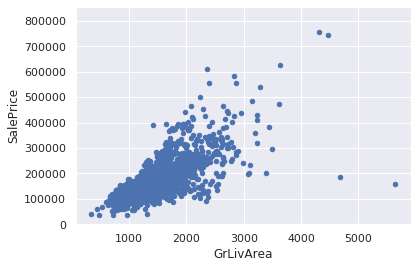

In [21]:
#Let's see the scatter again
rel(df_train,'GrLivArea')

* We can see that there are two big values of GrLivArea which don't follow the crowd.
* These two values are the 7s from the previous analysis. Hence it would be better do delete them.

In [22]:
#delete points
df_train.sort_values(by='GrLivArea',ascending=False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [23]:
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

# Multivariate Analysis

* Normality: We should have our data in normal distribution because a lot of statistical test rely on this. In this example we will do univariate normality but it doesn't ensure multivariate normality.
* Homoscedasticity: We want homoscedasticity because we want the error term to be the same across all values of the independent variables.

### Search for normality


*    Histogram - Kurtosis and skewness.
*    Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.


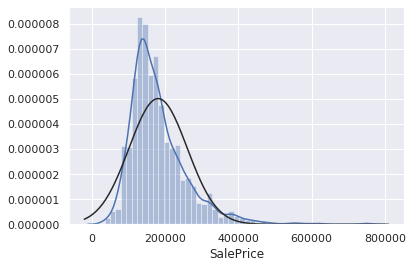

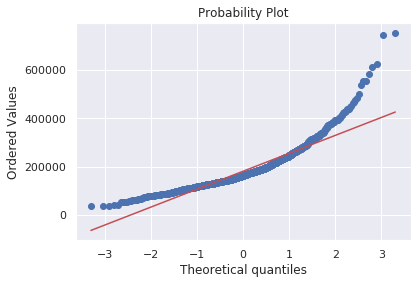

In [24]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'],fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'],plot=plt);

## In case of positive skewness,as this one, log transformations usually works well.

In [25]:
#applying log transformation
df_train['SalePrice']=np.log(df_train['SalePrice'])

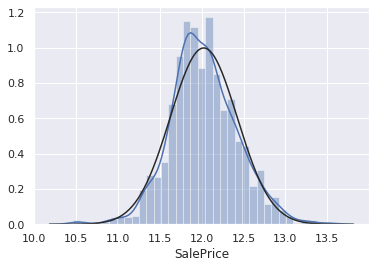

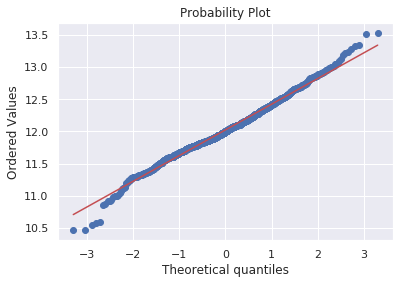

In [26]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'],fit=norm)
fig = plt.figure()
res=stats.probplot(df_train['SalePrice'],plot=plt)

In [27]:
# Let's function the prior methods
#histogram and normal probability plot function
def hist_norprob(data,var):
    '''
    This is a function that returns two plots, histagram of norma distribution and norma probability
    '''
    sns.distplot(data[var],fit=norm);
    fig=plt.figure()
    res=stats.probplot(df_train[var],plot=plt);
    
#applying log transformation function
def logran(data,var):
    '''
    This is a function that returns the log of a variable
    '''
    data[var]=np.log(data[var])
    return data


### Let's check 'GrLivArea'

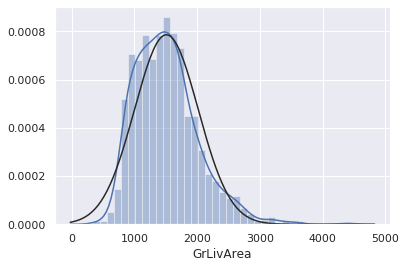

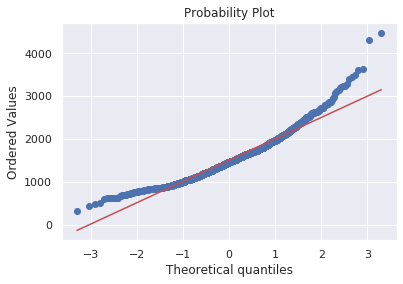

In [28]:
#histogram and normal probability plot
hist_norprob(df_train,'GrLivArea')

## Let's do the log to make it normal distribution

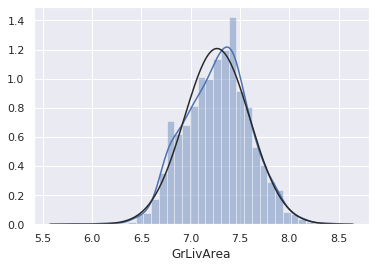

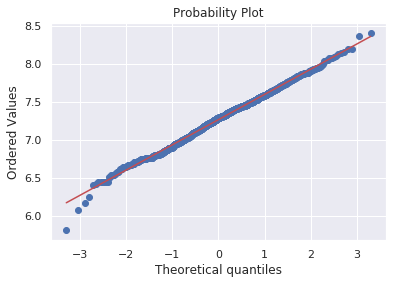

In [29]:
df_train=logran(df_train,'GrLivArea')
hist_norprob(df_train,'GrLivArea')

## The same thing with 'TotalBsmtSF'

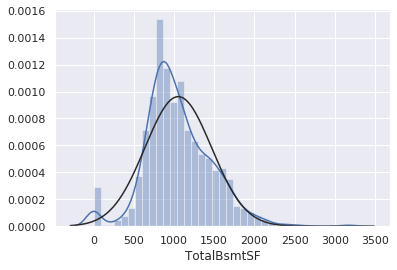

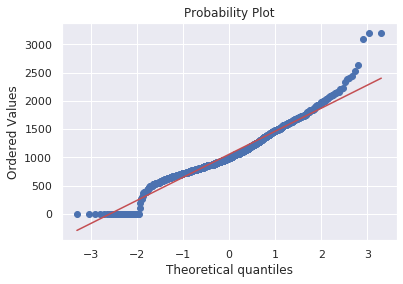

In [30]:
#histogram and normal probability plot
hist_norprob(df_train,'TotalBsmtSF')

In this situation we face a different problem. We have a significant number of value that it is zero (no basement)
* We'll create a variable that has the values of having or not basement (binary value)
* Then we will log all the non-zero observations and this will help us to not loose the effect of zero observations

In [35]:
# Let's create one column for the new variable
df_train['Hasbsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['Hasbsmt']=0
df_train.loc[df_train['TotalBsmtSF']>0,'Hasbsmt'] = 1

In [36]:
#tranform data
df_train.loc[df_train['Hasbsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])


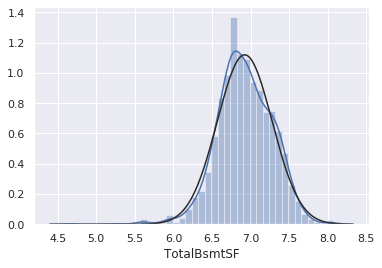

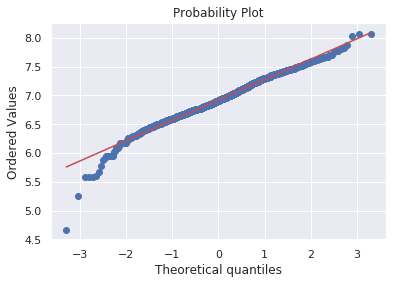

In [37]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

# Let's she homoscedasticity
* The best approach to test homoscedasticity for two metric variables is graphically

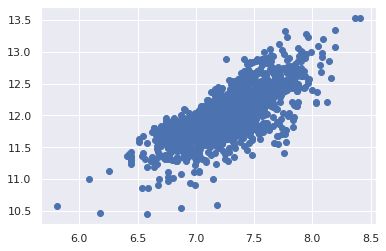

In [38]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

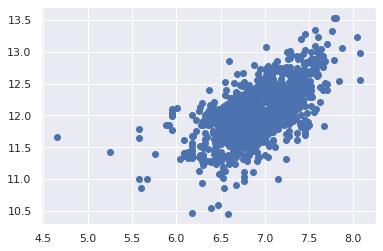

In [39]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);


# Final part

#### Convert categorical variable into dummy

In [41]:
df_train=pd.get_dummies(df_train)

In [44]:
df_train

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,0,0,0,1,0,0,0,0,1,0
